# Fall Prep Notebook 4

## Building a Final Vehicle Sales Model

This notebook has a few exercises that can serve as a primer for what to expect in the `Fall Problem Session 4` notebook. These exercises will touch upon the basic python, `pandas`, `numpy`, `matplotlib` and some basic supervised learning techniques that you may want a refresher on prior to starting `Fall Problem Session 4`.

#### 1. Load in `carseats.csv`

Load in `carseats.csv` using `pandas`.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")

In [4]:
carseats = pd.read_csv('../../Data/carseats.csv')

#### 2. Train test split

Make a train test split for `carseats`.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_cseats, test_cseats = train_test_split(carseats,
                                             test_size = 0.2,
                                             random_state = 100,
                                             shuffle = True)

#### 3. EDA

##### a.

Look at the first five observations of the training set.

In [7]:
train_cseats.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
190,8.79,130,37,13,297,101,Medium,37,13,No,Yes
46,12.44,127,90,14,16,70,Medium,48,15,No,Yes
50,1.42,99,32,18,341,108,Bad,80,16,Yes,Yes
377,6.81,132,61,0,263,125,Medium,41,12,No,No
121,11.67,125,89,10,380,87,Bad,28,10,Yes,Yes


##### b.

Use `pairplot` to examine the potential for a linear relationship between `Sales` and:
- `Advertising`
- `Income` and 
- `CompPrice`.

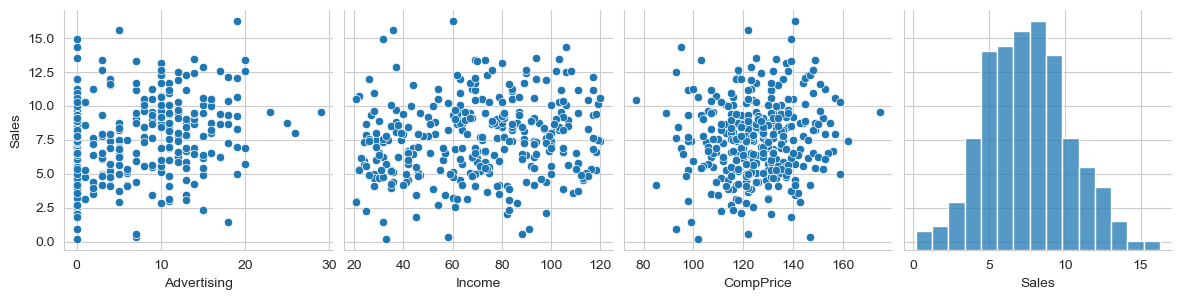

In [15]:
sns.pairplot(data=train_cseats,
             x_vars = ['Advertising','Income','CompPrice','Sales'],
             y_vars = ['Sales'],
             height = 3)

plt.show()

##### c.

Look at the correlations for the variables you considered in the previous problem.

In [19]:
train_cseats[['Advertising','Income','CompPrice','Sales']].corr()

,Advertising,Income,CompPrice,Sales
Advertising,1.000000,0.044245,-0.024344,0.257089
Income,0.044245,1.000000,-0.116202,0.147344
CompPrice,-0.024344,-0.116202,1.000000,0.100922
Sales,0.257089,0.147344,0.100922,1.000000


##### d.

Use `seaborn`'s `lmplot`, <a href="https://seaborn.pydata.org/generated/seaborn.lmplot.html">https://seaborn.pydata.org/generated/seaborn.lmplot.html</a>, to investigate a potential linear relationship between `Sales` and `Price`.

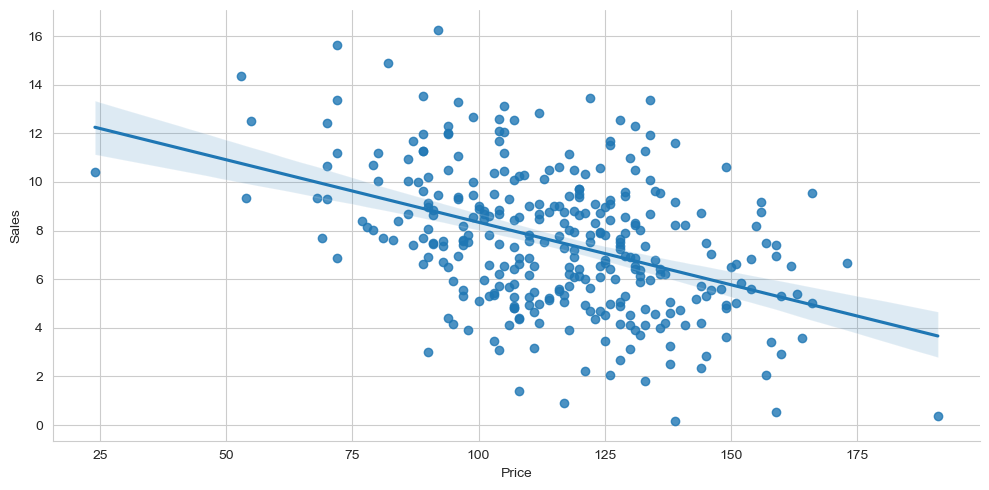

In [25]:
sns.lmplot(data=train_cseats,
             x = 'Price',
             y = 'Sales',
             height=5,
             aspect=2)

plt.show()

##### e.

Use the `hue` argument of `lmplot` to investigate potential interactions between `Age` and `ShelveLoc`.

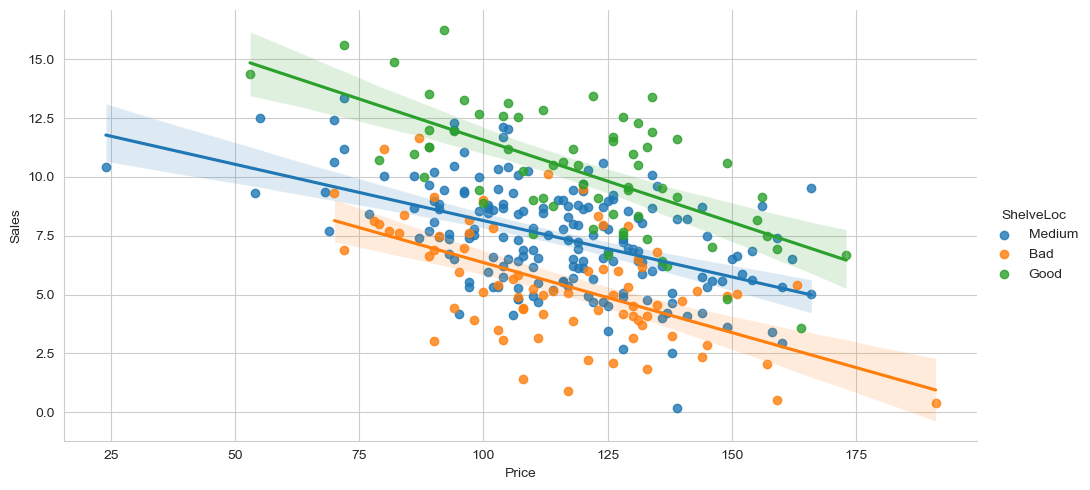

In [57]:
sns.lmplot(data=train_cseats,
             x = 'Price',
             y = 'Sales',
             height=5,
             aspect=2,
             hue = 'ShelveLoc')

plt.show()

#### 4. Preparing data

Make appropriate one-hot encoded variables for `ShelveLoc`.

In [31]:
pd.get_dummies(test_cseats['ShelveLoc'])

,Bad,Good,Medium
248,0,0,1
318,0,1,0
173,0,0,1
285,0,0,1
184,0,0,1
...,...,...,...
358,1,0,0
166,0,0,1
198,0,0,1
267,1,0,0


In [52]:
train_cseats[['ShelveGood','ShelveMedium']]=pd.get_dummies(train_cseats['ShelveLoc'])[['Good','Medium']]
test_cseats[['ShelveGood','ShelveMedium']]=pd.get_dummies(test_cseats['ShelveLoc'])[['Good','Medium']]

In [47]:
train_cseats.head(5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveGood,ShelveMedium
190,8.79,130,37,13,297,101,Medium,37,13,No,Yes,0,1
46,12.44,127,90,14,16,70,Medium,48,15,No,Yes,0,1
50,1.42,99,32,18,341,108,Bad,80,16,Yes,Yes,0,0
377,6.81,132,61,0,263,125,Medium,41,12,No,No,0,1
121,11.67,125,89,10,380,87,Bad,28,10,Yes,Yes,0,0


#### 5. Fitting a model

##### a.

Fit the following regression model using the training set.

$$
\text{Sales} = \beta_0 + \beta_1 \text{Price} + \beta_2 \left(\text{Shelve Location = Medium}\right) + \beta_3\left(\text{Shelve Location = Good}\right) + \epsilon
$$

In [35]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression(copy_X= True)

model.fit(train_cseats[['Price','ShelveMedium','ShelveGood']],
          train_cseats.Sales)

LinearRegression()

##### b.

Look at the estimates $\hat{\beta_0}$, $\hat{\beta_1}$, $\hat{\beta_2}$ and $\hat{\beta_3}$.

In [49]:
model.intercept_

11.835133978907592

In [51]:
model.coef_

array([-0.05541146,  1.9610983 ,  4.99874695])

##### c.

Get the training root mean squared error for this model.

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
np.sqrt(mean_squared_error(train_cseats.Sales,
                   model.predict(train_cseats[['Price','ShelveMedium','ShelveGood']])))

1.959646922620993

In [56]:
np.sqrt(mean_squared_error(test_cseats.Sales,
                   model.predict(test_cseats[['Price','ShelveMedium','ShelveGood']])))

1.6929124358321923

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)